In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch
from torch import nn
from torch.autograd import Variable
from torch.nn.functional import relu

In [2]:
print('test')

test


In [11]:
print('test')
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=nn.Linear(3, 20)
        self.l2=nn.Linear(20, 20)
        self.l3=nn.Linear(20, 20)
        self.l4=nn.Linear(20, 20)
        self.l5=nn.Linear(20, 20)
        self.l6=nn.Linear(20, 20)
        self.l7=nn.Linear(20, 20)
        self.l8=nn.Linear(20, 20)
        self.l9=nn.Linear(20, 20)
        self.l10=nn.Linear(20, 2)
        
    def forward(self, t,x,y):
        txy = torch.cat([t,x,y],axis=1)
        out=torch.tanh(self.l1(txy)) #does not work wth only relu, tanh better than sigmoid
        out=torch.tanh(self.l2(out))
        out=torch.tanh(self.l3(out))
        out=torch.tanh(self.l4(out))
        out=torch.tanh(self.l5(out))
        out=torch.tanh(self.l6(out))
        out=torch.tanh(self.l7(out))
        out=torch.tanh(self.l8(out))
        out=torch.tanh(self.l9(out))
        out=self.l10(out)
        return out
k=1
m=1
def f(net,t,x,y):
    psi=net(t,x,y)[:,0]
    p=net(t,x,y)[:,1]
    u = torch.autograd.grad(psi.sum(), y, create_graph=True)[0]
    v = -torch.autograd.grad(psi.sum(), x, create_graph=True)[0]
    ux = torch.autograd.grad(u.sum(), x, create_graph=True)[0]
    uy = torch.autograd.grad(u.sum(), y, create_graph=True)[0]
    vx = torch.autograd.grad(v.sum(), x, create_graph=True)[0]
    vy = torch.autograd.grad(v.sum(), y, create_graph=True)[0]
    uxx = torch.autograd.grad(ux.sum(), x, create_graph=True)[0]
    uyy = torch.autograd.grad(uy.sum(), y, create_graph=True)[0]
    vxx = torch.autograd.grad(vx.sum(), x, create_graph=True)[0]
    vyy = torch.autograd.grad(vy.sum(), y, create_graph=True)[0]
    ut = 0#torch.autograd.grad(u.sum(), t, create_graph=True)[0]
    vt = 0#torch.autograd.grad(v.sum(), t, create_graph=True)[0]
    px = torch.autograd.grad(p.sum(), x, create_graph=True)[0]
    py = torch.autograd.grad(p.sum(), y, create_graph=True)[0]
    f1=ut+(u*ux+v*uy)*1260+px-1500*(uxx+uyy)
    f2=vt+(u*vx+v*vy)*1260+py-1500*(vxx+vyy)
    mse1=nn.MSELoss()
    pt0 = Variable(torch.zeros_like(u), requires_grad=False).to(device)
    loss = mse1(f1,pt0)+mse1(f2, pt0)
    return loss

def u_err_y(net,u_bd,v_bd,y_bd):
    t_bc=np.zeros(1)
    x_bc=np.random.rand(1000)*20.0
    y_bc=np.ones(1)*y_bd
    t_bcm,x_bcm, y_bcm=np.meshgrid(t_bc,x_bc,y_bc)
    t_bcm=np.reshape(t_bcm,(1000,1))
    x_bcm=np.reshape(x_bcm,(1000,1))
    y_bcm=np.reshape(y_bcm,(1000,1))
    pt_t_bc = Variable(torch.from_numpy(t_bcm).float(), requires_grad=True).to(device)
    pt_x_bc = Variable(torch.from_numpy(x_bcm).float(), requires_grad=True).to(device)
    pt_y_bc = Variable(torch.from_numpy(y_bcm).float(), requires_grad=True).to(device)
    #pt_u_bc = Variable(torch.from_numpy(u_bcm).float(), requires_grad=True).to(device)
    #pt_v_bc = Variable(torch.from_numpy(v_bcm).float(), requires_grad=True).to(device)
    psi=net(pt_t_bc,pt_x_bc,pt_y_bc)[:,0]
    u = torch.autograd.grad(psi.sum(), pt_y_bc, create_graph=True)[0]
    v = -torch.autograd.grad(psi.sum(), pt_x_bc, create_graph=True)[0]
    mse1=nn.MSELoss()
    u0 = Variable(torch.ones_like(u)*u_bd, requires_grad=False).to(device)
    v0 = Variable(torch.ones_like(v)*v_bd, requires_grad=False).to(device)
    loss=mse1(u,u0)+mse1(v,v0)
    return loss

def u_err_x(net,u_bd,v_bd,x_bd):
    t_bc=np.zeros(1)
    y_bc=np.random.rand(1000)*1.0
    x_bc=np.ones(1)*x_bd
    t_bcm,x_bcm, y_bcm=np.meshgrid(t_bc,x_bc,y_bc)
    t_bcm=np.reshape(t_bcm,(1000,1))
    x_bcm=np.reshape(x_bcm,(1000,1))
    y_bcm=np.reshape(y_bcm,(1000,1))
    pt_t_bc = Variable(torch.from_numpy(t_bcm).float(), requires_grad=True).to(device)
    pt_x_bc = Variable(torch.from_numpy(x_bcm).float(), requires_grad=True).to(device)
    pt_y_bc = Variable(torch.from_numpy(y_bcm).float(), requires_grad=True).to(device)
    #pt_u_bc = Variable(torch.from_numpy(u_bcm).float(), requires_grad=True).to(device)
    #pt_v_bc = Variable(torch.from_numpy(v_bcm).float(), requires_grad=True).to(device)
    psi=net(pt_t_bc,pt_x_bc,pt_y_bc)[:,0]
    u = torch.autograd.grad(psi.sum(), pt_y_bc, create_graph=True)[0]
    v = -torch.autograd.grad(psi.sum(), pt_x_bc, create_graph=True)[0]
    mse1=nn.MSELoss()
    u0 = Variable(torch.ones_like(u)*u_bd, requires_grad=False).to(device)
    v0 = Variable(torch.ones_like(v)*v_bd, requires_grad=False).to(device)
    loss=mse1(u,u0)+mse1(v,v0)
    return loss

def u_err_circle(net,xm,ym,r):
    t_bc=np.zeros(1)
    phi=np.random.rand(1000)*2*np.pi
    t_bcm,phi_bcm=np.meshgrid(t_bc,phi)
    y_bcm=r*np.sin(phi_bcm)+ym
    x_bcm=r*np.cos(phi_bcm)+xm
    
    t_bcm=np.reshape(t_bcm,(1000,1))
    x_bcm=np.reshape(x_bcm,(1000,1))
    y_bcm=np.reshape(y_bcm,(1000,1))
    pt_t_bc = Variable(torch.from_numpy(t_bcm).float(), requires_grad=True).to(device)
    pt_x_bc = Variable(torch.from_numpy(x_bcm).float(), requires_grad=True).to(device)
    pt_y_bc = Variable(torch.from_numpy(y_bcm).float(), requires_grad=True).to(device)
    #pt_u_bc = Variable(torch.from_numpy(u_bcm).float(), requires_grad=True).to(device)
    #pt_v_bc = Variable(torch.from_numpy(v_bcm).float(), requires_grad=True).to(device)
    psi=net(pt_t_bc,pt_x_bc,pt_y_bc)[:,0]
    u = torch.autograd.grad(psi.sum(), pt_y_bc, create_graph=True)[0]
    v = -torch.autograd.grad(psi.sum(), pt_x_bc, create_graph=True)[0]
    mse1=nn.MSELoss()
    u0 = Variable(torch.zeros_like(u), requires_grad=False).to(device)
    v0 = Variable(torch.zeros_like(v), requires_grad=False).to(device)
    loss=mse1(u,u0)+mse1(v,v0)
    return loss

def u_err_p(net,p_bd,x_bd):
    t_bc=np.zeros(1)
    y_bc=np.random.rand(1000)*1.0
    x_bc=np.ones(1)*x_bd
    t_bcm,x_bcm, y_bcm=np.meshgrid(t_bc,x_bc,y_bc)
    t_bcm=np.reshape(t_bcm,(1000,1))
    x_bcm=np.reshape(x_bcm,(1000,1))
    y_bcm=np.reshape(y_bcm,(1000,1))
    pt_t_bc = Variable(torch.from_numpy(t_bcm).float(), requires_grad=True).to(device)
    pt_x_bc = Variable(torch.from_numpy(x_bcm).float(), requires_grad=True).to(device)
    pt_y_bc = Variable(torch.from_numpy(y_bcm).float(), requires_grad=True).to(device)
    p=net(pt_t_bc,pt_x_bc,pt_y_bc)[:,1]
    mse1=nn.MSELoss()
    p0 = Variable(torch.ones_like(p)*p_bd, requires_grad=False).to(device)
    loss=mse1(p,p0)
    return loss


test
Using cpu device


In [14]:

model = NeuralNetwork().to(device)
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
optimizer=torch.optim.Adam(model.parameters())
for i in range(10000):
    optimizer.zero_grad()
    loss1=u_err_circle(model,10.0,0.5,0.2)+u_err_y(model,0.001,0.0,0.0)+u_err_y(model,0.001,0.0,1.0)+u_err_x(model,0.001,0.0,20.0) +u_err_x(model,0.001,0.0,0.0)
    
    #pred_bc=model(pt_t_bc)
    #loss1=u(model,t0,u0)
    #pt01 = Variable(torch.from_numpy(np.zeros((2,1))).float(), requires_grad=False).to(device)
    
    t=np.zeros((1000,1))
    x=np.random.rand(1000,1)*20.0
    y=np.random.rand(1000,1)*1.0
    pt_t= Variable(torch.from_numpy(t).float(), requires_grad=True).to(device)
    pt_x= Variable(torch.from_numpy(x).float(), requires_grad=True).to(device)
    pt_y= Variable(torch.from_numpy(y).float(), requires_grad=True).to(device)
    loss2=f(model,pt_t, pt_x,pt_y)

    loss = loss2+100*loss1
    #loss = mse2(loss2,pt02)+mse1(pred_bc, pt01)

    # Backpropagation
    loss.backward()
    optimizer.step()
    print(i)
    print(loss1)
    print(loss2)

0
tensor(2.9478e-06, grad_fn=<AddBackward0>)
tensor(0.2862, grad_fn=<AddBackward0>)
1
tensor(4.8385e-06, grad_fn=<AddBackward0>)
tensor(0.0351, grad_fn=<AddBackward0>)
2
tensor(6.6461e-06, grad_fn=<AddBackward0>)
tensor(0.1366, grad_fn=<AddBackward0>)
3
tensor(6.2361e-06, grad_fn=<AddBackward0>)
tensor(0.1135, grad_fn=<AddBackward0>)
4
tensor(4.9487e-06, grad_fn=<AddBackward0>)
tensor(0.0282, grad_fn=<AddBackward0>)
5
tensor(3.9551e-06, grad_fn=<AddBackward0>)
tensor(0.0118, grad_fn=<AddBackward0>)
6
tensor(3.4594e-06, grad_fn=<AddBackward0>)
tensor(0.0405, grad_fn=<AddBackward0>)
7
tensor(3.3264e-06, grad_fn=<AddBackward0>)
tensor(0.0583, grad_fn=<AddBackward0>)
8
tensor(3.3605e-06, grad_fn=<AddBackward0>)
tensor(0.0478, grad_fn=<AddBackward0>)
9
tensor(3.5379e-06, grad_fn=<AddBackward0>)
tensor(0.0359, grad_fn=<AddBackward0>)
10
tensor(3.8117e-06, grad_fn=<AddBackward0>)
tensor(0.0151, grad_fn=<AddBackward0>)
11
tensor(4.2046e-06, grad_fn=<AddBackward0>)
tensor(0.0038, grad_fn=<AddBa

96
tensor(4.4375e-06, grad_fn=<AddBackward0>)
tensor(6.4437e-05, grad_fn=<AddBackward0>)
97
tensor(4.4363e-06, grad_fn=<AddBackward0>)
tensor(5.1054e-05, grad_fn=<AddBackward0>)
98
tensor(4.4338e-06, grad_fn=<AddBackward0>)
tensor(3.9968e-05, grad_fn=<AddBackward0>)
99
tensor(4.4304e-06, grad_fn=<AddBackward0>)
tensor(5.3451e-05, grad_fn=<AddBackward0>)
100
tensor(4.4268e-06, grad_fn=<AddBackward0>)
tensor(5.1100e-05, grad_fn=<AddBackward0>)
101
tensor(4.4254e-06, grad_fn=<AddBackward0>)
tensor(5.0393e-05, grad_fn=<AddBackward0>)
102
tensor(4.4227e-06, grad_fn=<AddBackward0>)
tensor(4.7704e-05, grad_fn=<AddBackward0>)
103
tensor(4.4195e-06, grad_fn=<AddBackward0>)
tensor(4.8765e-05, grad_fn=<AddBackward0>)
104
tensor(4.4179e-06, grad_fn=<AddBackward0>)
tensor(4.9325e-05, grad_fn=<AddBackward0>)
105
tensor(4.4146e-06, grad_fn=<AddBackward0>)
tensor(4.0284e-05, grad_fn=<AddBackward0>)
106
tensor(4.4119e-06, grad_fn=<AddBackward0>)
tensor(3.8199e-05, grad_fn=<AddBackward0>)
107
tensor(4.4

189
tensor(4.2706e-06, grad_fn=<AddBackward0>)
tensor(2.4585e-05, grad_fn=<AddBackward0>)
190
tensor(4.2680e-06, grad_fn=<AddBackward0>)
tensor(2.9236e-05, grad_fn=<AddBackward0>)
191
tensor(4.2650e-06, grad_fn=<AddBackward0>)
tensor(2.3767e-05, grad_fn=<AddBackward0>)
192
tensor(4.2637e-06, grad_fn=<AddBackward0>)
tensor(3.3620e-05, grad_fn=<AddBackward0>)
193
tensor(4.2606e-06, grad_fn=<AddBackward0>)
tensor(2.5529e-05, grad_fn=<AddBackward0>)
194
tensor(4.2585e-06, grad_fn=<AddBackward0>)
tensor(2.8529e-05, grad_fn=<AddBackward0>)
195
tensor(4.2571e-06, grad_fn=<AddBackward0>)
tensor(3.1371e-05, grad_fn=<AddBackward0>)
196
tensor(4.2566e-06, grad_fn=<AddBackward0>)
tensor(2.8484e-05, grad_fn=<AddBackward0>)
197
tensor(4.2544e-06, grad_fn=<AddBackward0>)
tensor(2.9258e-05, grad_fn=<AddBackward0>)
198
tensor(4.2538e-06, grad_fn=<AddBackward0>)
tensor(2.6939e-05, grad_fn=<AddBackward0>)
199
tensor(4.2530e-06, grad_fn=<AddBackward0>)
tensor(2.7438e-05, grad_fn=<AddBackward0>)
200
tensor

281
tensor(4.1014e-06, grad_fn=<AddBackward0>)
tensor(2.2351e-05, grad_fn=<AddBackward0>)
282
tensor(4.1033e-06, grad_fn=<AddBackward0>)
tensor(1.9881e-05, grad_fn=<AddBackward0>)
283
tensor(4.1028e-06, grad_fn=<AddBackward0>)
tensor(2.3301e-05, grad_fn=<AddBackward0>)
284
tensor(4.1008e-06, grad_fn=<AddBackward0>)
tensor(2.1382e-05, grad_fn=<AddBackward0>)
285
tensor(4.0998e-06, grad_fn=<AddBackward0>)
tensor(1.8169e-05, grad_fn=<AddBackward0>)
286
tensor(4.0976e-06, grad_fn=<AddBackward0>)
tensor(2.1356e-05, grad_fn=<AddBackward0>)
287
tensor(4.0945e-06, grad_fn=<AddBackward0>)
tensor(2.1104e-05, grad_fn=<AddBackward0>)
288
tensor(4.0912e-06, grad_fn=<AddBackward0>)
tensor(1.9485e-05, grad_fn=<AddBackward0>)
289
tensor(4.0881e-06, grad_fn=<AddBackward0>)
tensor(2.0833e-05, grad_fn=<AddBackward0>)
290
tensor(4.0839e-06, grad_fn=<AddBackward0>)
tensor(2.0327e-05, grad_fn=<AddBackward0>)
291
tensor(4.0809e-06, grad_fn=<AddBackward0>)
tensor(2.3715e-05, grad_fn=<AddBackward0>)
292
tensor

374
tensor(3.9519e-06, grad_fn=<AddBackward0>)
tensor(1.5977e-05, grad_fn=<AddBackward0>)
375
tensor(3.9493e-06, grad_fn=<AddBackward0>)
tensor(1.9187e-05, grad_fn=<AddBackward0>)
376
tensor(3.9489e-06, grad_fn=<AddBackward0>)
tensor(1.3228e-05, grad_fn=<AddBackward0>)
377
tensor(3.9460e-06, grad_fn=<AddBackward0>)
tensor(1.7243e-05, grad_fn=<AddBackward0>)
378
tensor(3.9450e-06, grad_fn=<AddBackward0>)
tensor(1.6116e-05, grad_fn=<AddBackward0>)
379
tensor(3.9433e-06, grad_fn=<AddBackward0>)
tensor(1.4321e-05, grad_fn=<AddBackward0>)
380
tensor(3.9406e-06, grad_fn=<AddBackward0>)
tensor(1.6370e-05, grad_fn=<AddBackward0>)
381
tensor(3.9384e-06, grad_fn=<AddBackward0>)
tensor(1.5630e-05, grad_fn=<AddBackward0>)
382
tensor(3.9384e-06, grad_fn=<AddBackward0>)
tensor(1.7571e-05, grad_fn=<AddBackward0>)
383
tensor(3.9369e-06, grad_fn=<AddBackward0>)
tensor(1.6923e-05, grad_fn=<AddBackward0>)
384
tensor(3.9346e-06, grad_fn=<AddBackward0>)
tensor(1.6818e-05, grad_fn=<AddBackward0>)
385
tensor

466
tensor(3.8076e-06, grad_fn=<AddBackward0>)
tensor(1.6981e-05, grad_fn=<AddBackward0>)
467
tensor(3.8078e-06, grad_fn=<AddBackward0>)
tensor(1.5679e-05, grad_fn=<AddBackward0>)
468
tensor(3.8071e-06, grad_fn=<AddBackward0>)
tensor(1.6841e-05, grad_fn=<AddBackward0>)
469
tensor(3.8054e-06, grad_fn=<AddBackward0>)
tensor(1.5344e-05, grad_fn=<AddBackward0>)
470
tensor(3.8036e-06, grad_fn=<AddBackward0>)
tensor(1.2863e-05, grad_fn=<AddBackward0>)
471
tensor(3.8030e-06, grad_fn=<AddBackward0>)
tensor(1.8993e-05, grad_fn=<AddBackward0>)
472
tensor(3.8008e-06, grad_fn=<AddBackward0>)
tensor(1.4247e-05, grad_fn=<AddBackward0>)
473
tensor(3.7989e-06, grad_fn=<AddBackward0>)
tensor(1.5967e-05, grad_fn=<AddBackward0>)
474
tensor(3.7971e-06, grad_fn=<AddBackward0>)
tensor(1.3260e-05, grad_fn=<AddBackward0>)
475
tensor(3.7967e-06, grad_fn=<AddBackward0>)
tensor(1.4590e-05, grad_fn=<AddBackward0>)
476
tensor(3.7942e-06, grad_fn=<AddBackward0>)
tensor(1.3746e-05, grad_fn=<AddBackward0>)
477
tensor

559
tensor(3.6548e-06, grad_fn=<AddBackward0>)
tensor(1.3441e-05, grad_fn=<AddBackward0>)
560
tensor(3.6505e-06, grad_fn=<AddBackward0>)
tensor(1.5198e-05, grad_fn=<AddBackward0>)
561
tensor(3.6495e-06, grad_fn=<AddBackward0>)
tensor(1.2885e-05, grad_fn=<AddBackward0>)
562
tensor(3.6471e-06, grad_fn=<AddBackward0>)
tensor(1.3136e-05, grad_fn=<AddBackward0>)
563
tensor(3.6454e-06, grad_fn=<AddBackward0>)
tensor(1.4268e-05, grad_fn=<AddBackward0>)
564
tensor(3.6452e-06, grad_fn=<AddBackward0>)
tensor(1.4154e-05, grad_fn=<AddBackward0>)
565
tensor(3.6425e-06, grad_fn=<AddBackward0>)
tensor(1.2814e-05, grad_fn=<AddBackward0>)
566
tensor(3.6424e-06, grad_fn=<AddBackward0>)
tensor(1.4256e-05, grad_fn=<AddBackward0>)
567
tensor(3.6393e-06, grad_fn=<AddBackward0>)
tensor(1.2845e-05, grad_fn=<AddBackward0>)
568
tensor(3.6370e-06, grad_fn=<AddBackward0>)
tensor(1.4461e-05, grad_fn=<AddBackward0>)
569
tensor(3.6317e-06, grad_fn=<AddBackward0>)
tensor(1.2877e-05, grad_fn=<AddBackward0>)
570
tensor

651
tensor(3.4531e-06, grad_fn=<AddBackward0>)
tensor(1.4107e-05, grad_fn=<AddBackward0>)
652
tensor(3.4509e-06, grad_fn=<AddBackward0>)
tensor(1.3856e-05, grad_fn=<AddBackward0>)
653
tensor(3.4450e-06, grad_fn=<AddBackward0>)
tensor(1.2650e-05, grad_fn=<AddBackward0>)
654
tensor(3.4425e-06, grad_fn=<AddBackward0>)
tensor(1.4071e-05, grad_fn=<AddBackward0>)
655
tensor(3.4400e-06, grad_fn=<AddBackward0>)
tensor(1.2657e-05, grad_fn=<AddBackward0>)
656
tensor(3.4378e-06, grad_fn=<AddBackward0>)
tensor(1.4712e-05, grad_fn=<AddBackward0>)
657
tensor(3.4344e-06, grad_fn=<AddBackward0>)
tensor(1.0856e-05, grad_fn=<AddBackward0>)
658
tensor(3.4327e-06, grad_fn=<AddBackward0>)
tensor(1.2188e-05, grad_fn=<AddBackward0>)
659
tensor(3.4295e-06, grad_fn=<AddBackward0>)
tensor(1.2163e-05, grad_fn=<AddBackward0>)
660
tensor(3.4289e-06, grad_fn=<AddBackward0>)
tensor(1.2748e-05, grad_fn=<AddBackward0>)
661
tensor(3.4260e-06, grad_fn=<AddBackward0>)
tensor(1.2880e-05, grad_fn=<AddBackward0>)
662
tensor

743
tensor(3.1202e-06, grad_fn=<AddBackward0>)
tensor(1.3227e-05, grad_fn=<AddBackward0>)
744
tensor(3.1202e-06, grad_fn=<AddBackward0>)
tensor(1.4161e-05, grad_fn=<AddBackward0>)
745
tensor(3.1148e-06, grad_fn=<AddBackward0>)
tensor(1.2392e-05, grad_fn=<AddBackward0>)
746
tensor(3.1111e-06, grad_fn=<AddBackward0>)
tensor(1.3358e-05, grad_fn=<AddBackward0>)
747
tensor(3.1029e-06, grad_fn=<AddBackward0>)
tensor(1.3187e-05, grad_fn=<AddBackward0>)
748
tensor(3.0976e-06, grad_fn=<AddBackward0>)
tensor(1.3854e-05, grad_fn=<AddBackward0>)
749
tensor(3.0960e-06, grad_fn=<AddBackward0>)
tensor(1.2385e-05, grad_fn=<AddBackward0>)
750
tensor(3.0898e-06, grad_fn=<AddBackward0>)
tensor(1.4567e-05, grad_fn=<AddBackward0>)
751
tensor(3.0821e-06, grad_fn=<AddBackward0>)
tensor(1.2845e-05, grad_fn=<AddBackward0>)
752
tensor(3.0796e-06, grad_fn=<AddBackward0>)
tensor(1.3101e-05, grad_fn=<AddBackward0>)
753
tensor(3.0723e-06, grad_fn=<AddBackward0>)
tensor(1.3398e-05, grad_fn=<AddBackward0>)
754
tensor

835
tensor(2.6611e-06, grad_fn=<AddBackward0>)
tensor(1.8374e-05, grad_fn=<AddBackward0>)
836
tensor(2.6518e-06, grad_fn=<AddBackward0>)
tensor(1.7353e-05, grad_fn=<AddBackward0>)
837
tensor(2.6511e-06, grad_fn=<AddBackward0>)
tensor(1.9138e-05, grad_fn=<AddBackward0>)
838
tensor(2.6422e-06, grad_fn=<AddBackward0>)
tensor(1.6846e-05, grad_fn=<AddBackward0>)
839
tensor(2.6298e-06, grad_fn=<AddBackward0>)
tensor(1.8291e-05, grad_fn=<AddBackward0>)
840
tensor(2.6230e-06, grad_fn=<AddBackward0>)
tensor(1.7516e-05, grad_fn=<AddBackward0>)
841
tensor(2.6141e-06, grad_fn=<AddBackward0>)
tensor(1.8529e-05, grad_fn=<AddBackward0>)
842
tensor(2.6108e-06, grad_fn=<AddBackward0>)
tensor(1.8078e-05, grad_fn=<AddBackward0>)
843
tensor(2.6102e-06, grad_fn=<AddBackward0>)
tensor(2.0153e-05, grad_fn=<AddBackward0>)
844
tensor(2.6069e-06, grad_fn=<AddBackward0>)
tensor(1.8407e-05, grad_fn=<AddBackward0>)
845
tensor(2.6008e-06, grad_fn=<AddBackward0>)
tensor(1.9516e-05, grad_fn=<AddBackward0>)
846
tensor

927
tensor(2.1034e-06, grad_fn=<AddBackward0>)
tensor(2.2452e-05, grad_fn=<AddBackward0>)
928
tensor(2.0961e-06, grad_fn=<AddBackward0>)
tensor(2.2739e-05, grad_fn=<AddBackward0>)
929
tensor(2.0958e-06, grad_fn=<AddBackward0>)
tensor(2.8542e-05, grad_fn=<AddBackward0>)
930
tensor(2.0853e-06, grad_fn=<AddBackward0>)
tensor(2.4483e-05, grad_fn=<AddBackward0>)
931
tensor(2.0813e-06, grad_fn=<AddBackward0>)
tensor(2.2147e-05, grad_fn=<AddBackward0>)
932
tensor(2.0752e-06, grad_fn=<AddBackward0>)
tensor(2.3355e-05, grad_fn=<AddBackward0>)
933
tensor(2.0672e-06, grad_fn=<AddBackward0>)
tensor(2.3770e-05, grad_fn=<AddBackward0>)
934
tensor(2.0571e-06, grad_fn=<AddBackward0>)
tensor(2.4393e-05, grad_fn=<AddBackward0>)
935
tensor(2.0559e-06, grad_fn=<AddBackward0>)
tensor(2.5094e-05, grad_fn=<AddBackward0>)
936
tensor(2.0438e-06, grad_fn=<AddBackward0>)
tensor(2.5442e-05, grad_fn=<AddBackward0>)
937
tensor(2.0447e-06, grad_fn=<AddBackward0>)
tensor(2.3622e-05, grad_fn=<AddBackward0>)
938
tensor

1019
tensor(1.5335e-06, grad_fn=<AddBackward0>)
tensor(2.7312e-05, grad_fn=<AddBackward0>)
1020
tensor(1.5220e-06, grad_fn=<AddBackward0>)
tensor(2.6453e-05, grad_fn=<AddBackward0>)
1021
tensor(1.5159e-06, grad_fn=<AddBackward0>)
tensor(2.5909e-05, grad_fn=<AddBackward0>)
1022
tensor(1.5114e-06, grad_fn=<AddBackward0>)
tensor(2.6911e-05, grad_fn=<AddBackward0>)
1023
tensor(1.5023e-06, grad_fn=<AddBackward0>)
tensor(2.8724e-05, grad_fn=<AddBackward0>)
1024
tensor(1.5042e-06, grad_fn=<AddBackward0>)
tensor(2.6138e-05, grad_fn=<AddBackward0>)
1025
tensor(1.5003e-06, grad_fn=<AddBackward0>)
tensor(2.7654e-05, grad_fn=<AddBackward0>)
1026
tensor(1.4938e-06, grad_fn=<AddBackward0>)
tensor(2.5171e-05, grad_fn=<AddBackward0>)
1027
tensor(1.4779e-06, grad_fn=<AddBackward0>)
tensor(2.5620e-05, grad_fn=<AddBackward0>)
1028
tensor(1.4741e-06, grad_fn=<AddBackward0>)
tensor(2.6219e-05, grad_fn=<AddBackward0>)
1029
tensor(1.4779e-06, grad_fn=<AddBackward0>)
tensor(2.7840e-05, grad_fn=<AddBackward0>)

1110
tensor(1.0953e-06, grad_fn=<AddBackward0>)
tensor(2.0629e-05, grad_fn=<AddBackward0>)
1111
tensor(1.0911e-06, grad_fn=<AddBackward0>)
tensor(2.0492e-05, grad_fn=<AddBackward0>)
1112
tensor(1.0851e-06, grad_fn=<AddBackward0>)
tensor(2.1143e-05, grad_fn=<AddBackward0>)
1113
tensor(1.0846e-06, grad_fn=<AddBackward0>)
tensor(2.2422e-05, grad_fn=<AddBackward0>)
1114
tensor(1.0839e-06, grad_fn=<AddBackward0>)
tensor(2.0979e-05, grad_fn=<AddBackward0>)
1115
tensor(1.0752e-06, grad_fn=<AddBackward0>)
tensor(2.0270e-05, grad_fn=<AddBackward0>)
1116
tensor(1.0782e-06, grad_fn=<AddBackward0>)
tensor(2.0952e-05, grad_fn=<AddBackward0>)
1117
tensor(1.0641e-06, grad_fn=<AddBackward0>)
tensor(2.2644e-05, grad_fn=<AddBackward0>)
1118
tensor(1.0697e-06, grad_fn=<AddBackward0>)
tensor(2.0336e-05, grad_fn=<AddBackward0>)
1119
tensor(1.0630e-06, grad_fn=<AddBackward0>)
tensor(2.0895e-05, grad_fn=<AddBackward0>)
1120
tensor(1.0542e-06, grad_fn=<AddBackward0>)
tensor(1.9351e-05, grad_fn=<AddBackward0>)

1202
tensor(8.8443e-07, grad_fn=<AddBackward0>)
tensor(1.7093e-05, grad_fn=<AddBackward0>)
1203
tensor(8.8097e-07, grad_fn=<AddBackward0>)
tensor(1.4643e-05, grad_fn=<AddBackward0>)
1204
tensor(8.8000e-07, grad_fn=<AddBackward0>)
tensor(1.5332e-05, grad_fn=<AddBackward0>)
1205
tensor(8.8033e-07, grad_fn=<AddBackward0>)
tensor(1.5918e-05, grad_fn=<AddBackward0>)
1206
tensor(8.8240e-07, grad_fn=<AddBackward0>)
tensor(1.2882e-05, grad_fn=<AddBackward0>)
1207
tensor(8.7827e-07, grad_fn=<AddBackward0>)
tensor(1.3803e-05, grad_fn=<AddBackward0>)
1208
tensor(8.7941e-07, grad_fn=<AddBackward0>)
tensor(1.5140e-05, grad_fn=<AddBackward0>)
1209
tensor(8.7941e-07, grad_fn=<AddBackward0>)
tensor(1.4333e-05, grad_fn=<AddBackward0>)
1210
tensor(8.7982e-07, grad_fn=<AddBackward0>)
tensor(1.4211e-05, grad_fn=<AddBackward0>)
1211
tensor(8.7676e-07, grad_fn=<AddBackward0>)
tensor(1.6107e-05, grad_fn=<AddBackward0>)
1212
tensor(8.7283e-07, grad_fn=<AddBackward0>)
tensor(1.6359e-05, grad_fn=<AddBackward0>)

KeyboardInterrupt: 

torch.Size([2500])


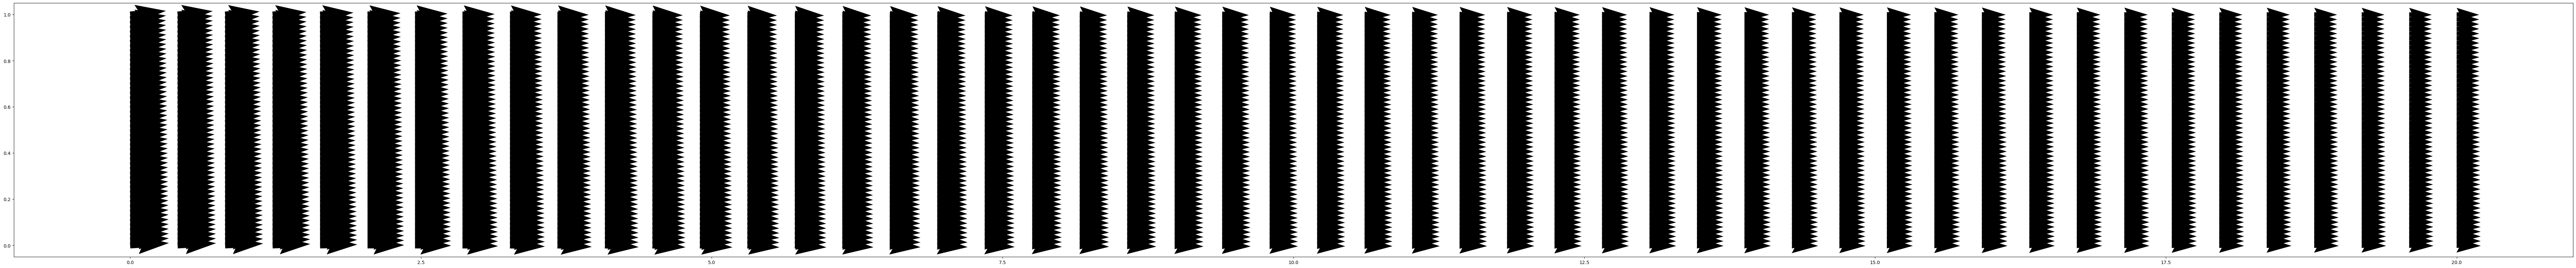

Text(0, 0.5, 'u')

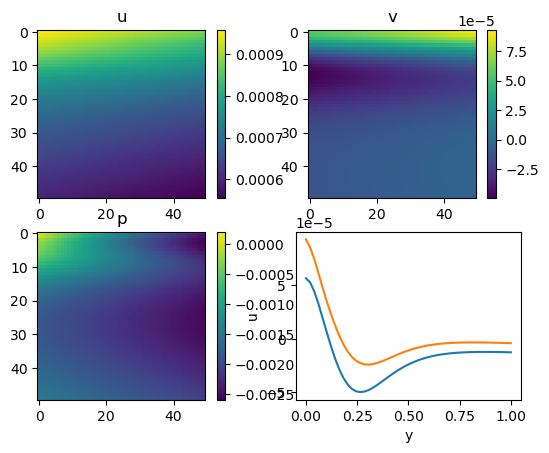

In [15]:

t_bc=np.zeros(1)
x_bc=np.linspace(0,20,50)
y_bc=np.linspace(0,1,50)
t_bcm,x_bcm, y_bcm=np.meshgrid(t_bc,x_bc,y_bc)
t_bcm=np.reshape(t_bcm,(2500,1))
x_bcm=np.reshape(x_bcm,(2500,1))
y_bcm=np.reshape(y_bcm,(2500,1))
pt_t_bc= Variable(torch.from_numpy(t_bcm).float(), requires_grad=True).to(device)
pt_x_bc= Variable(torch.from_numpy(x_bcm).float(), requires_grad=True).to(device)
pt_y_bc= Variable(torch.from_numpy(y_bcm).float(), requires_grad=True).to(device)
psi=model(pt_t_bc,pt_x_bc,pt_y_bc)[:,0]
print(np.shape(psi))
p=model(pt_t_bc,pt_x_bc,pt_y_bc)[:,1]
u = torch.autograd.grad(psi.sum(), pt_y_bc, create_graph=True)[0]
v = -torch.autograd.grad(psi.sum(), pt_x_bc, create_graph=True)[0]
fig=plt.gcf()
fig.set_size_inches(100,10)
plt.quiver(x_bcm,y_bcm,u.detach().numpy().reshape((50,50)),v.detach().numpy().reshape((50,50)))
plt.show()
plt.subplot(2,2,1)
plt.imshow(u.detach().numpy().reshape((50,50)))
plt.title('u')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(v.detach().numpy().reshape((50,50)))
plt.title('v')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(p.detach().numpy().reshape((50,50)))
plt.title('p')
plt.colorbar()
plt.subplot(2,2,4)
plt.plot(np.linspace(0,1,50),v.detach().numpy().reshape((50,50))[:,0])
plt.plot(np.linspace(0,1,50),v.detach().numpy().reshape((50,50))[:,-1])
#plt.plot(np.linspace(0,1,50),(np.linspace(0,1,50)-0.5)**2*0.5-0.125)
plt.xlabel('y')
plt.ylabel('u')
#plt.plot(t_test, np.sin(t_test))